# Two Traveling Salespeople


## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [62]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])

In [63]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])}")

Positions:
          x         y
0  0.297535  0.368242
1  0.056713  0.957155
2  0.272656  0.140351
3  0.477665  0.870087
4  0.812169  0.473608
5  0.479977  0.800911
6  0.392785  0.520477
7  0.836079  0.678880
8  0.337396  0.720633
9  0.648172  0.582020
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.636250  0.229245  0.533194  0.525310  0.469561  0.179578   
1  0.636250  0.000000  0.844867  0.429862  0.896957  0.451182  0.551028   
2  0.229245  0.844867  0.000000  0.757987  0.634140  0.692330  0.398657   
3  0.533194  0.429862  0.757987  0.000000  0.518737  0.069215  0.359766   
4  0.525310  0.896957  0.634140  0.518737  0.000000  0.466346  0.421995   
5  0.469561  0.451182  0.692330  0.069215  0.466346  0.000000  0.293676   
6  0.179578  0.551028  0.398657  0.359766  0.421995  0.293676  0.000000   
7  0.621712  0.827556  0.779396  0.406227  0.206659  0.376431  0.470745   
8  0.354638  0.367050  0.583882  0.204968  0.535192  0.

In [64]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    if len(tour) > 1:
        tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

objective value: 2.881937519770044


Tour length (red): 1.9
Tour length (blue): 2.88


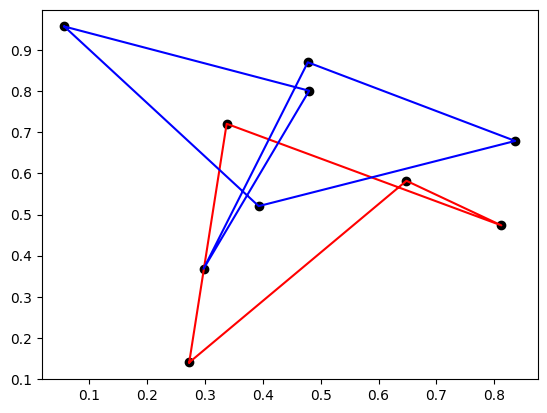

In [65]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

**Definition of local moves**: swapping a city from tour 1 with a city from tour 2.

In [11]:
def generate_neighbors(tour1, tour2):
    neighbors = []

    for i in range(len(tour1)):
        for j in range(len(tour2)):
            new_tour1, new_tour2 = tour1[:], tour2[:]
            new_tour1[i], new_tour2[j] = new_tour2[j], new_tour1[i]
            neighbors.append((new_tour1, new_tour2))
    return neighbors

def SA_hill_climb_2tsp(tsp, tour_pair):
    current_tour = tour_pair
    best_value = tour_pair_max_length(tsp, current_tour)
    improved = True
    moves = 0 # moves analyzed

    while improved:
        improved = False
        neighbors = generate_neighbors(*current_tour)
        moves += len(neighbors)
        for neighbor in neighbors:
            value = tour_pair_max_length(tsp, neighbor)
            if value < best_value:
                current_tour = neighbor
                best_value = value
                improved = True
                break

    return current_tour, best_value, moves

In [59]:
def run_1(n_instances=50, n_cities=10):
    total_value, total_moves = 0, 0
    for _ in range(n_instances):
        tsp = random_tsp(n_cities)
        tour_pair = random_tour_pair(n_cities)
        _, best_value, moves = SA_hill_climb_2tsp(tsp, tour_pair)
        total_value += best_value
        total_moves += moves
    print(f"Average objective function: {total_value / n_instances:.2f}")
    print(f"Average number of moves analyzed: {total_moves / n_instances:.2f}")


run_1()

Average objective function: 2.76
Average number of moves analyzed: 118.78


## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

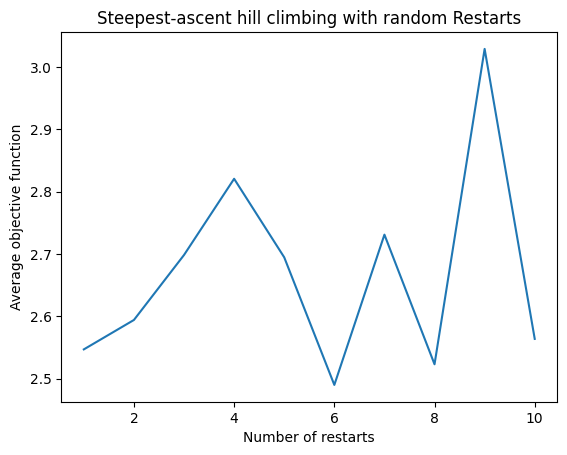

In [118]:
def random_restarts(tsp, tour_pair, time_limit=None, n_restarts=10):
    start_time = time.time()
    best_value_over_restarts = []
    moves_r = 0

    for restart in range(n_restarts):
        if time_limit and time.time() - start_time < time_limit or time_limit==None:
          _, best_value, moves = SA_hill_climb_2tsp(tsp, tour_pair)
          moves_r += moves
          best_value_over_restarts.append(best_value)

          # restart by creating a new random tour pair:
          tour_pair = random_tour_pair(len(tsp["pos"]))

    return best_value_over_restarts, moves_r

def random_restarts_2(tsp, tour_pair, time_limit=None, n_restarts=10):
    start_time = time.time()
    best_value_over_restarts = tour_pair_max_length(tsp, tour_pair)
    moves_r = 0

    for restart in range(n_restarts):
        if time_limit and time.time() - start_time < time_limit or time_limit==None:
          _, best_value, moves = SA_hill_climb_2tsp(tsp, tour_pair)
          moves_r += moves
          if best_value < best_value_over_restarts:
                best_value_over_restarts = best_value
                break

          # restart by creating a new random tour pair:
          tour_pair = random_tour_pair(len(tsp["pos"]))

    return best_value_over_restarts, moves_r

def run_2_restarts(n_instances=50, n_cities=10, n_restarts=10):
    restart_values = []

    for _ in range(n_instances):
        tsp = random_tsp(n_cities)
        tour_pair = random_tour_pair(n_cities)
        best_values, _ = random_restarts(tsp, tour_pair, n_restarts)
        restart_values.append(best_values)

    avg_values = np.mean(restart_values, axis=0) # average for each restart

    # ploting:
    plt.plot(range(1, n_restarts + 1), avg_values)
    plt.xlabel('Number of restarts')
    plt.ylabel('Average objective function')
    plt.title('Steepest-ascent hill climbing with random Restarts')
    plt.show()

run_2_restarts()

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [111]:
# Stochastic hill climbing:
def S_hill_climb_2tsp(tsp, tour_pair, time_limit=None):
    start_time = time.time()
    current_tour = tour_pair
    current_value = tour_pair_max_length(tsp, current_tour)
    moves = 0

    while time_limit and time.time() - start_time < time_limit or time_limit==None:
        neighbors = generate_neighbors(*current_tour)
        moves += len(neighbors)

        # leave only improving moves:
        improving_moves = [neighbor for neighbor in neighbors if tour_pair_max_length(tsp, neighbor) < current_value]

        if not improving_moves:
            break # no improving moves

        # randomly select an improving move:
        selected_move = improving_moves[np.random.randint(len(improving_moves))]
        current_tour = selected_move
        current_value = tour_pair_max_length(tsp, current_tour)

    return current_value, moves

def run_3_stochastic(n_instances=50, n_cities=10):
    total_value, total_moves = 0, 0
    for _ in range(n_instances):
        tsp = random_tsp(n_cities)
        tour_pair = random_tour_pair(n_cities)
        best_value, moves_analyzed = S_hill_climb_2tsp(tsp, tour_pair)
        total_value += best_value
        total_moves += moves_analyzed

    print(f"Average objective function: {total_value / n_instances:.2f}")
    print(f"Average moves analyzed: {total_moves / n_instances:.2f}")

run_3_stochastic()

Average objective function: 2.34
Average moves analyzed: 111.52


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [94]:
def generate_random_neighbor(tour1, tour2):
    if not tour1 or not tour2:
        return tour1, tour2   # no swap possible

    i, j = np.random.randint(len(tour1)), np.random.randint(len(tour2))

    new_tour1, new_tour2 = tour1[:], tour2[:]
    new_tour1[i], new_tour2[j] = new_tour2[j], new_tour1[i]

    return new_tour1, new_tour2

def FC_hill_climb_2tsp(tsp, tour_pair, max_attempts=1000):
    current_tour = tour_pair
    current_value = tour_pair_max_length(tsp, current_tour)
    moves_analyzed = 0

    for _ in range(max_attempts):
        new_tour = generate_random_neighbor(*current_tour)
        moves_analyzed += 1
        new_value = tour_pair_max_length(tsp, new_tour)

        if new_value < current_value:  # accept fist improving move
            current_tour = new_tour
            current_value = new_value
            break

    return current_tour, current_value, moves_analyzed

def run_4_FC(n_instances=50, n_cities=10):
    total_value, total_moves = 0, 0
    for _ in range(n_instances):
        tsp = random_tsp(n_cities)
        tour_pair = random_tour_pair(n_cities)
        _, best_value, moves_analyzed = FC_hill_climb_2tsp(tsp, tour_pair)
        total_value += best_value
        total_moves += moves_analyzed

    print(f"Average Objective Function: {total_value / n_instances:.2f}")
    print(f"Average Moves Analyzed: {total_moves / n_instances:.2f}")

run_4_FC()

Average Objective Function: 3.65
Average Moves Analyzed: 181.70


## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [108]:
def simA_2tsp(tsp, tour_pair, time_limit=None, t=1000, alpha=0.99, t_min=1e-3):
    start_time = time.time()
    current_tour = tour_pair
    current_value = tour_pair_max_length(tsp, current_tour)
    best_tour, best_value = current_tour, current_value
    moves = 0

    while time_limit and t > t_min and time.time() - start_time < time_limit or time_limit == None and t > t_min:
        new_tour = generate_random_neighbor(*current_tour)
        new_value = tour_pair_max_length(tsp, new_tour)
        moves += 1

        delta = new_value - current_value
        if delta < 0 or np.random.rand() < np.exp(-delta / t):
            current_tour, current_value = new_tour, new_value
            if current_value < best_value:
                best_tour, best_value = current_tour, current_value

        t *= alpha  # reduce tempr

    return best_value, moves #, best_tour

def run_5_SA(n_instances=50, n_cities=10, t=1000, alpha=0.99, t_min=1e-3):
    total_value, total_moves = 0, 0
    for _ in range(n_instances):
        tsp = random_tsp(n_cities)
        tour_pair = random_tour_pair(n_cities)
        best_value, moves = simA_2tsp(tsp, tour_pair, t, alpha, t_min)
        total_value += best_value
        total_moves += moves
    print(f"Average Objective Function: {total_value / n_instances:.2f}")
    print(f"Average Moves Analyzed: {total_moves / n_instances:.2f}")

run_5_SA()

Average Objective Function: 3.47
Average Moves Analyzed: 1.00


## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [105]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.16927719116210938 milliseconds


In [123]:
def run_6_time(n_instances=50, city_sizes=[10, 20, 50], time_limit=0.1):
    results = {"cities": [], "algorithm": [], "avg objective": [], "avg moves": []}

    for n_cities in city_sizes:
        for algo_name, algo in [
            ("Random restarts hill climbing", random_restarts_2),
            ("Stochastic hill climbing", S_hill_climb_2tsp),
            ("Simulated annealing", simA_2tsp)
        ]:
            total_value, total_moves = 0, 0
            for restart in range(n_instances):
                tsp = random_tsp(n_cities)
                tour_pair = random_tour_pair(n_cities)
                best_value, moves = algo(tsp, tour_pair, time_limit)
                total_value += best_value
                total_moves += moves

            avg_obj = total_value / n_instances
            avg_moves = total_moves / n_instances

            results["cities"].append(n_cities)
            results["algorithm"].append(algo_name)
            results["avg objective"].append(avg_obj)
            results["avg moves"].append(avg_moves)

            print(f"{algo_name}({n_cities} cities) - Avg Objective: {avg_obj:.2f}, Avg Moves: {avg_moves:.2f}\n")

    return pd.DataFrame(results)

df_results = run_6_time()

Random restarts hill climbing(10 cities) - Avg Objective: 2.36, Avg Moves: 152.78

Stochastic hill climbing(10 cities) - Avg Objective: 2.68, Avg Moves: 104.68

Simulated annealing(10 cities) - Avg Objective: 2.24, Avg Moves: 1375.00

Random restarts hill climbing(20 cities) - Avg Objective: 4.05, Avg Moves: 1652.96

Stochastic hill climbing(20 cities) - Avg Objective: 4.56, Avg Moves: 1144.86

Simulated annealing(20 cities) - Avg Objective: 3.99, Avg Moves: 1375.00

Random restarts hill climbing(50 cities) - Avg Objective: 7.34, Avg Moves: 49014.96

Stochastic hill climbing(50 cities) - Avg Objective: 13.85, Avg Moves: 6005.48

Simulated annealing(50 cities) - Avg Objective: 9.28, Avg Moves: 1375.00



**Conclusion**: for smaller problem sizes (10 and 20 citeis), simulated annealing outperforms both random restarts hill climbing and stochastic hill climbing in terms of achieving lower objective values, despite requiring significantly more moves. However, for larger problems (50 cities), random restarts hill climbing provides the best balance between objective value and moves, while stochastic hill climbing struggles with higher objective values and fewer moves analyzed.









## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394469, -1515002.377525561), ('Maryland', 1979094.0929296287, -383219.5841403244), ('Wisconsin', 789405.1598855292, 7178.093118233844), ('Florida', 1716480.2191801812, -1645210.600897309), ('Georgia', 1548181.6569137496, -1221152.92728593), ('Tennessee', 1227400.6102994615, -915322.7518723847), ('Minnesota', 437251.5679414956, 158022.4684412311), ('Iowa', 536318.2702880212, -303823.8620393781), ('Missouri', 657464.3949930624, -708334.2472004973), ('Michigan', 1154374.0876788201, 31062.850406589027), ('Idaho', -1153546.3198592367, 32306.322358552956), ('California', -1708049.274751084, -667730.6252787685), ('Connecticut', 2216157.7595848595, -1386.5813699763721), ('Texas', 66673.11730108206, -1502504.3982431893), ('Virginia', 1848871.780566167, -594407.8114616707), ('New York', 1957067.0071638965, 68085.33717547444), ('Illinois', 917185.1983259161, -491248.59737063444), ('Montana', -727314.0192655406, 271896.712857685), ('Kentucky', 12904

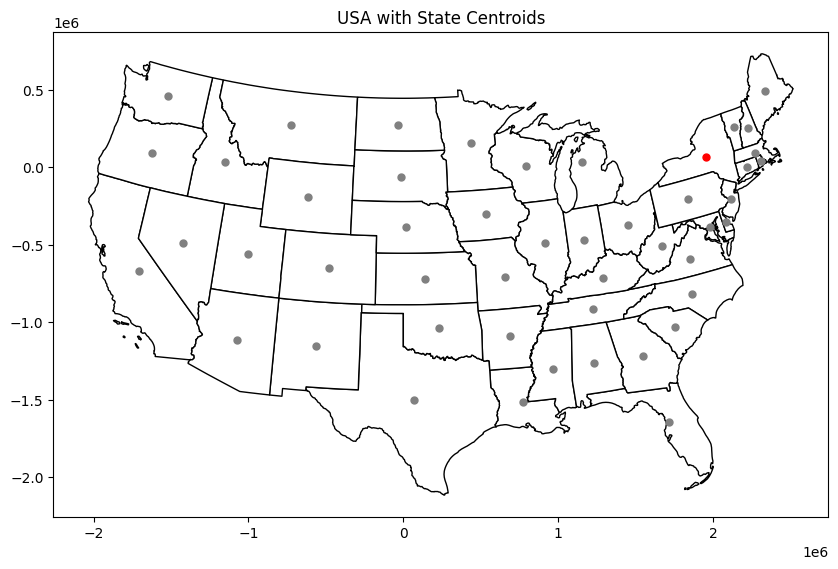

In [169]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()

Loaded from states.pkl
Best value: 67122260.02534229
Best tour pair (blue and red): ([46, 31, 43, 42, 45, 35, 41, 34, 28, 8, 36, 17, 10, 0, 44, 14, 3, 24, 37, 20, 27, 15, 12], [32, 13, 9, 6, 40, 7, 33, 30, 26, 47, 25, 11, 19, 21, 2, 23, 4, 1, 29, 38, 5, 18, 39, 22])


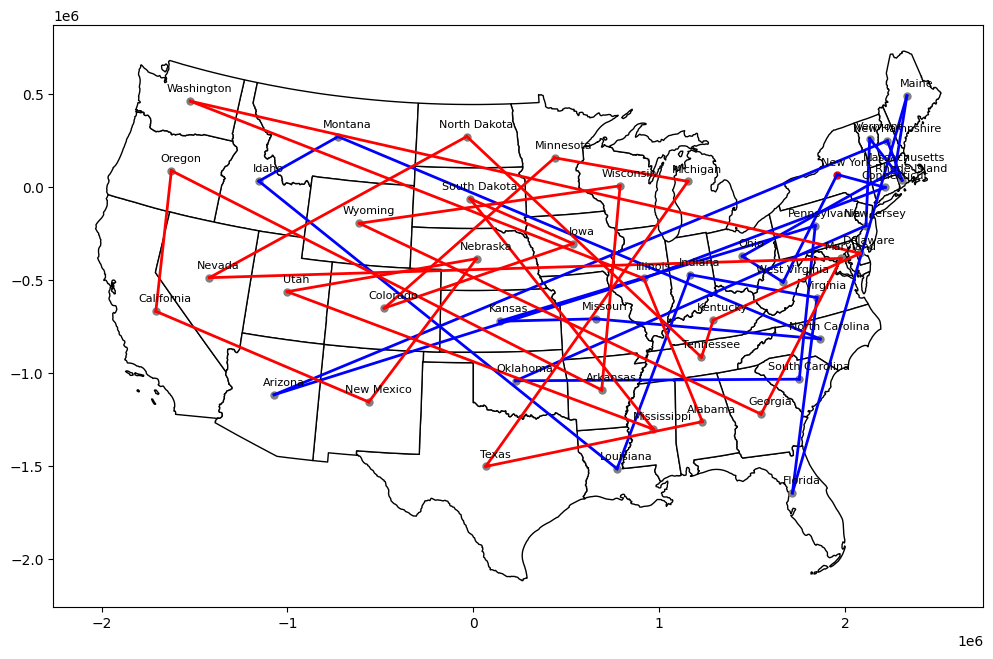

In [185]:
# calculate distances between centroids
def calculate_distances(centroids):
    n = len(centroids)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean((centroids[i][1], centroids[i][2]), (centroids[j][1], centroids[j][2]))
            dist_matrix[i][j] = dist_matrix[j][i] = dist
    return dist_matrix

# random restarts:
def random_restarts_2_us(tsp, time_limit=None, n_restarts=10):
    dist_matrix = calculate_distances(tsp)
    best_value, best_pair, moves_r = SA_hill_climb_2tsp(dist_matrix, n_restarts, time_limit)
    return best_value, best_pair, moves_r


def plot_best_tours(tsp, best_pair, contiguous_usa):
    tour1, tour2 = best_pair

    fig, ax = plt.subplots(figsize=(12, 10))

    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    for i, (state_name, x, y) in enumerate(tsp):
        color = 'red' if state_name == 'New York' else 'grey'
        ax.plot(x, y, marker='o', color=color, markersize=5)
        ax.text(x + 50000, y + 50000, state_name, fontsize=8, ha='center')

    def plot_tour(tour, color):
        last_x, last_y = tsp[16][1], tsp[16][2]
        for state in tour:
            x, y = tsp[state][1], tsp[state][2]
            ax.plot([last_x, x], [last_y, y], color=color, linewidth=2)
            last_x, last_y = x, y
        ax.plot([last_x, tsp[16][1]], [last_y, tsp[16][2]], color=color, linewidth=2)

    plot_tour(tour1, 'blue')
    plot_tour(tour2, 'red')

    plt.title(f"")
    plt.show()

def run_2tsp():
    contiguous_usa, state_tuples = get_state_centroids()

    best_value, best_pair, moves_r = random_restarts_2_us(state_tuples, time_limit=None, n_restarts=50)

    print(f"Best value: {best_value}")
    print(f"Best tour pair (blue and red): {best_pair}")

    # plot:
    plot_best_tours(state_tuples, best_pair, contiguous_usa)

run_2tsp()




---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
